In [18]:
from sklearn.cluster import KMeans

In [22]:
kmeans_model1 =KMeans(n_clusters = 4, random_state=111) #고객군의 군집을 3개정도만 나눠보기

In [23]:
kmeans_model1

KMeans(n_clusters=4, random_state=111)

In [27]:
# fit_predict 메서드를 이용해서 라벨을 확인할 수 있다.
kmeans_model1.fit_predict(df_mns_sp)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 3, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 2, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int32)

In [28]:
df['cluster_kn']=  kmeans_model1.fit_predict(df_mns_sp)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_kn
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


Text(0.5, 1.0, 'Average Score')

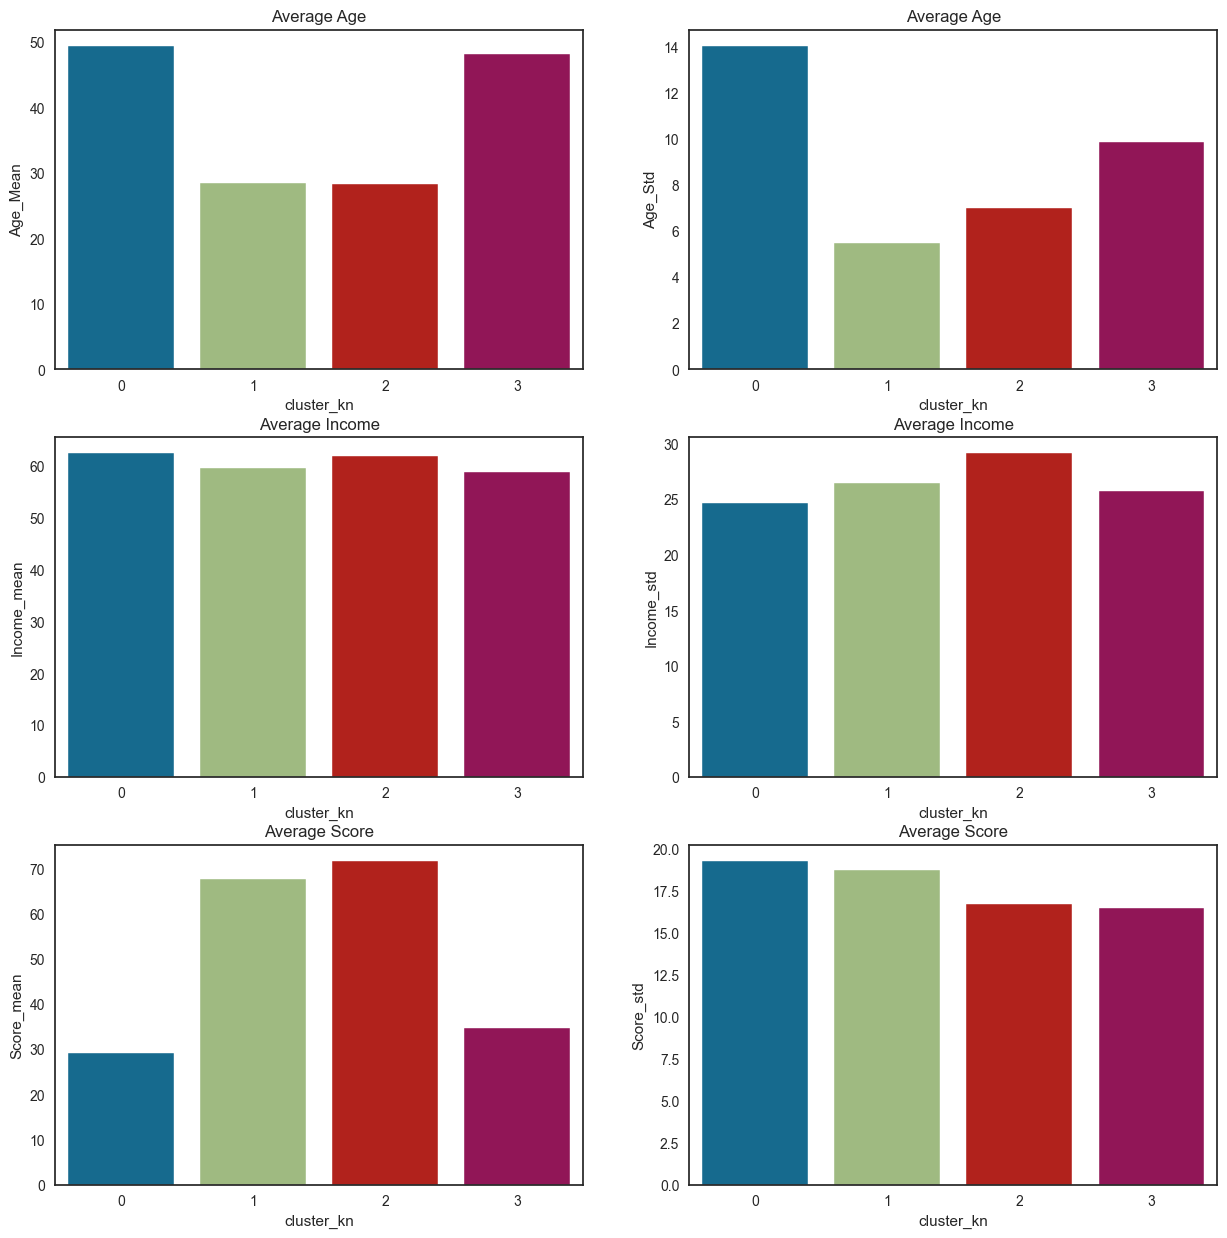

In [38]:
## 클러스터링 된 값들을 groupby 로 볼 수 있다.

cluster_stats= df.groupby('cluster_kn').agg({
    'Gender': 'count',
    'Age':['mean','std'],
    'Annual Income (k$)' :['mean','std'],
    'Spending Score (1-100)':['mean','std']
})

#간단하게 시각화 진행해 보기!

cluster_stats.columns = ['Count','Age_Mean','Age_Std','Income_mean','Income_std','Score_mean','Score_std']

# 시각화
fig, axes = plt.subplots(3,2, figsize=(15,15))

# Age 평균, 표준편차 시각화
sns.barplot(x=cluster_stats.index, y ='Age_Mean', data=cluster_stats, ax =axes[0,0])
axes[0,0].set_title('Average Age')

sns.barplot(x=cluster_stats.index, y ='Age_Std', data=cluster_stats, ax =axes[0,1])
axes[0,1].set_title('Average Age')

sns.barplot(x=cluster_stats.index, y ='Income_mean', data=cluster_stats, ax =axes[1,0])
axes[1,0].set_title('Average Income')

sns.barplot(x=cluster_stats.index, y ='Income_std', data=cluster_stats, ax =axes[1,1])
axes[1,1].set_title('Average Income')

sns.barplot(x=cluster_stats.index, y ='Score_mean', data=cluster_stats, ax =axes[2,0])
axes[2,0].set_title('Average Score')

sns.barplot(x=cluster_stats.index, y ='Score_std', data=cluster_stats, ax =axes[2,1])
axes[2,1].set_title('Average Score')

In [31]:
cluster_stats

Gender        Age            Annual Income (k$)             \
            count       mean        std               mean        std   
cluster_kn                                                              
0              48  49.437500  14.028703          62.416667  24.696311   
1              57  28.438596   5.493560          59.666667  26.463812   
2              40  28.250000   6.975231          62.000000  29.117798   
3              55  48.109091   9.836954          58.818182  25.771856   

           Spending Score (1-100)             
                             mean        std  
cluster_kn                                    
0                       29.208333  19.266284  
1                       67.684211  18.712255  
2                       71.675000  16.727664  
3                       34.781818  16.465104

# RFM 분석
- RFM 고객 분석하기 위한 피처를 R,F,M 피처를 가지고 고객을 이해하고, 고객을 분석하자라는 분석 방법론
- R : Recency : 고객 중 가장 최근 구매한 상품 구입일과 현재 기준까지의 기간 
- F : Frequency : 상품 구매 횟수, 주문 횟수 ( 기준에 따라 다르다. )
- M : Monetary : 고객의 총 주문 금액
---
- 기준을 잘 정해야 한다. 
- 도메인에 따라 조금씩 바뀔 수 있다.
- RFM 피처 외에 추가적인 더해서 분석할 수 있다. 
- 쿠폰에 대한 사용, 고객의 불만율, 고객의 다양한 제품 구매, 고객의 지속기간, 손익 등 피처로 추가해서
- 4개의 피처로도 분석이 가능하다. 

In [40]:
retail_df=pd.read_excel(io='online_retail_II.xlsx')

In [43]:
retail_sp=retail_df[0:10000]

In [46]:
# 취소반품 고객 제외 
retail_sp=retail_sp[retail_sp['Price']>0]
# 주문 취소했으니 주문 수량도 - 인 경우 제외 
retail_sp=retail_sp[retail_sp['Quantity']>0]


In [51]:
# 회원인 고객만 분석 가정 
retail_sp=retail_sp[retail_sp['Customer ID'].notnull()]

In [54]:
# 구매 국가도 영국으로만 지정
retail_sp=retail_sp[retail_sp['Country']=='United Kingdom']

In [55]:
retail_sp

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
9671,490147,20982,12 PENCILS TALL TUBE SKULLS,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom
9672,490147,20983,12 PENCILS TALL TUBE RED SPOTTY,48,2009-12-04 09:31:00,0.85,13408.0,United Kingdom
9673,490147,84879,ASSORTED COLOUR BIRD ORNAMENT,160,2009-12-04 09:31:00,1.45,13408.0,United Kingdom
9674,490147,84988,SET OF 72 PINK HEART PAPER DOILIES,48,2009-12-04 09:31:00,1.45,13408.0,United Kingdom


- M 피처 
- Quantity * Price	 = Monetary M피처 만들기

In [57]:
retail_sp['sales_amount']= retail_sp['Quantity']*retail_sp['Price']

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_57511/2989240422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_sp['sales_amount']= retail_sp['Quantity']*retail_sp['Price']


In [59]:
retail_sp['Customer ID'] = retail_sp['Customer ID'].astype(int)

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_57511/4167498907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_sp['Customer ID'] = retail_sp['Customer ID'].astype(int)


- 고객 하나 하나의 지표를 수립하는 것
- Customer ID별로 groupby를 진행해야 한다. 

In [61]:
#rfm 지표 만들기


agg_rfm = {
    'InvoiceDate' :'max', #주문일자, 가장 최근이니 max
    'Invoice' : 'count', #카운트 -> 주문 제품 수량 
    'sales_amount' : 'sum' # 전체 주문 금액 sum
}

cust_df =retail_sp.groupby('Customer ID').agg(agg_rfm)

- Timestamp('2009-12-04 09:31:00') 가장 최근 주문  날짜

In [62]:
cust_df 

,InvoiceDate,Invoice,sales_amount
Customer ID,,,
12835,2009-12-03 12:13:00,31,285.09
12836,2009-12-01 14:19:00,30,423.87
12842,2009-12-02 08:15:00,3,397.20
12872,2009-12-03 20:03:00,43,407.22
12913,2009-12-01 12:18:00,5,537.96
...,...,...,...
18087,2009-12-01 09:44:00,6,394.74
18102,2009-12-03 13:42:00,30,20761.24
18108,2009-12-02 12:47:00,26,493.25


In [66]:
max(retail_sp.InvoiceDate)

Timestamp('2009-12-04 09:31:00')

In [72]:
import datetime as dt 
# R 피처를 추가적으로 만들기 위해서

cust_df['Recency']= cust_df['InvoiceDate'] - dt.datetime(2009,12,31)

In [77]:
# timedelta 계산된 값을 x.days+1로 나눠서 수치형으로 변환
cust_df['Recency']=cust_df['Recency'].apply(lambda x: x.days+1)

In [79]:
cust_rfm=cust_df[['Invoice','sales_amount','Recency']]

In [80]:
cust_rfm

,Invoice,sales_amount,Recency
Customer ID,,,
12835,31,285.09,-27
12836,30,423.87,-29
12842,3,397.20,-28
12872,43,407.22,-27
12913,5,537.96,-29
...,...,...,...
18087,6,394.74,-29
18102,30,20761.24,-27
18108,26,493.25,-28


-----
- 1.1 기존 데이터의 EDA를 통해 피처들간의 시각화, 통계치 등 분석, 인사이트 정리
    - 원본 데이터에 대한 분석
    
- 1.2 RFM 피처를 만들기 위한 기준을 각자 정해서 기준점 코드로 데이터 전처리
    - e.g. 반품은 제외하거나 , 영국 고객만 분석하거나, 비회원은 제외하거나 등등
- 1.3 RFM 피처를 만들어서 실제 통계치로 비교해 보기 

- 1.4 RFM 피처를 통해 군집화 진행 
    - 우리가 배운 KMeans를 통해 군집화 진행 
    - 최적의 군집이 몇 이고? 그런 근거들을 코드와 시각화를 통해 정리
    
- 1.5 RFM 피처에 군집된 label 원본데이터 붙이기 
    - 전체 데이터셋에 label이 형성될 것 
    
- 1.6 RFM 피처를 이용하여 붙인 label로 다른 피처들 분석하기 
    - e.g. 이 고객군들의 주문 제품들은 무엇인지?
    - 시계열 적으로 볼 때 고객들의 주문 패턴등은 어떤 식으로?
    - Description에 대한 추가 분석 등을 조금 더 진행하시면 됩니다.
    
- 1.7 해당 데이터셋의 고객군들의 RFM 지표의 기초통계치를 정리하고, 시각화를 통해 군집들의 기초통계치 ( 군집들의 RFM 지표를 같이 정리 )
    - 전체 RFM 지표의 통계치
    - 우리가 군집한 군집들의 RFM 지표 통계치 
    - 통계치는 (평균, 중앙값, 표준편차, 최빈값 등등 )

In [82]:
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
